In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

([<matplotlib.axis.XTick at 0x1ef4954d460>], [Text(-4, 0, '−4')])

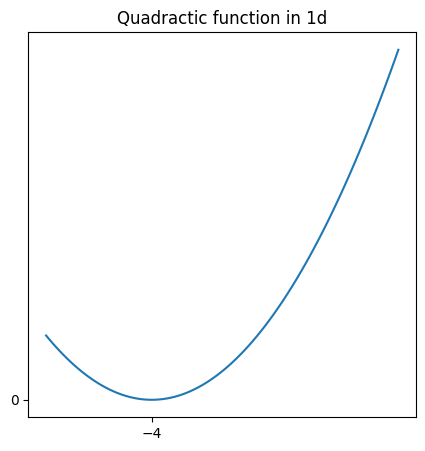

In [2]:
# Quadratic function in 1D

plotting_x = np.linspace(-10,10,100)
quadratic_fn_1d = (plotting_x+4)**2

plt.figure(figsize=(5,5))
plt.title("Quadractic function in 1d")
plt.plot(plotting_x, quadratic_fn_1d)
plt.yticks([0])
plt.xticks([-4])

([<matplotlib.axis.XTick at 0x1ef4b63b040>], [Text(-4, 0, '−4')])

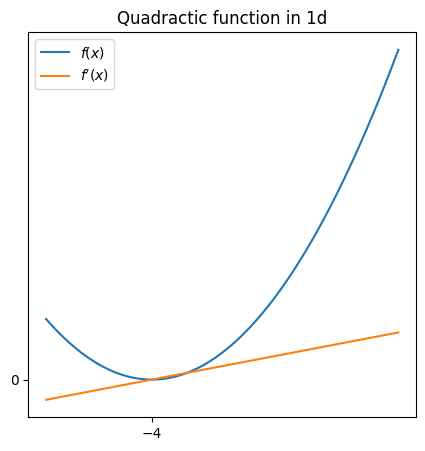

In [3]:
deriv_quadratic_fn_1d = 2*(plotting_x + 4)

plt.figure(figsize=(5,5))
plt.title("Quadractic function in 1d")
plt.plot(plotting_x, quadratic_fn_1d, label='$f(x)$')
plt.plot(plotting_x, deriv_quadratic_fn_1d, label="$f'(x)$")
plt.legend()
plt.yticks([0])
plt.xticks([-4])

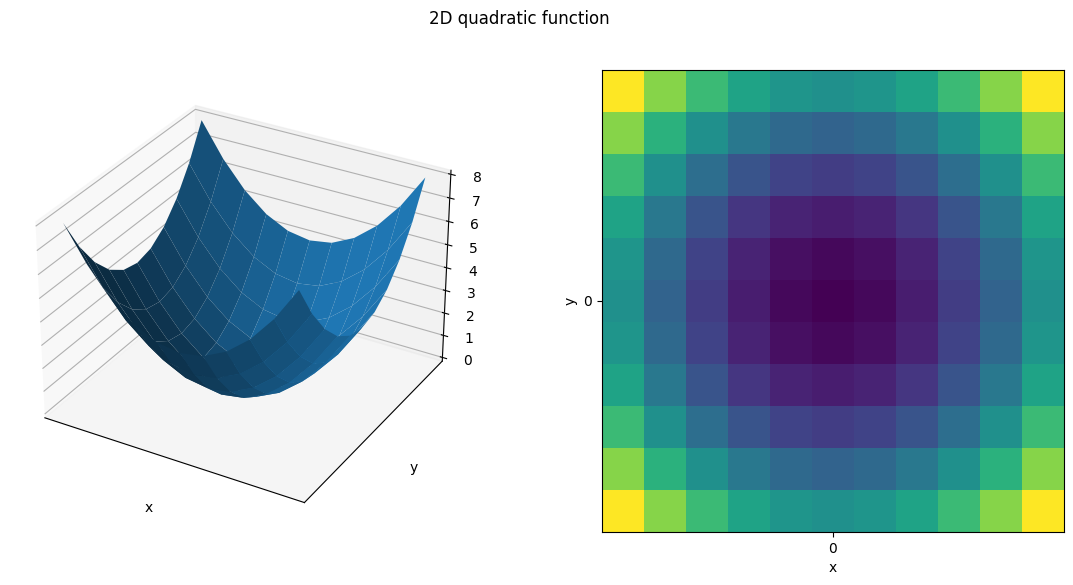

In [4]:
# Quadratic function in 2D

plotting_x = np.linspace(-2,2,11)
plotting_y = np.linspace(-2,2,11)

xx, yy = np.meshgrid(plotting_x, plotting_y)

quadratic_fn_2d = xx**2 + yy**2

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(xx, yy, quadratic_fn_2d)
plt.xlabel('x')
plt.ylabel('y')
plt.xticks([])
plt.yticks([])
plt.subplot(122)
plt.imshow(quadratic_fn_2d, extent=[-2,2,-2,2])
plt.xlabel('x')
plt.ylabel('y')
plt.xticks([0.0])
plt.yticks([0.0])
plt.suptitle('2D quadratic function');

In [5]:
# 2D line fitting example 1

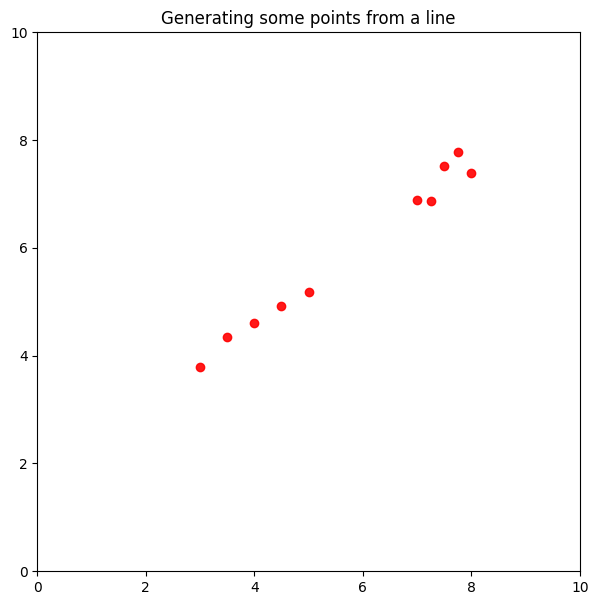

In [6]:
# Generate some data
np.random.seed(0)

m_true = .75
c_true = 1

x = np.hstack([np.linspace(3, 5, 5), np.linspace(7, 8, 5)])
y = m_true * x + c_true + np.random.rand(len(x))
data = np.vstack([x, y]).T
n = data.shape[0]

plt.figure(figsize=(7,7))
plt.scatter(data[:,0], data[:,1], c='red', alpha=0.9)
plt.xlim([0,10])
plt.ylim([0,10])
plt.title('Generating some points from a line');

In [7]:
x = data[:,0]
y = data[:,1]

print(f'x =\n{x.reshape(n,1)}')
print(f'y =\n{y.reshape(n,1)}')

x =
[[3.  ]
 [3.5 ]
 [4.  ]
 [4.5 ]
 [5.  ]
 [7.  ]
 [7.25]
 [7.5 ]
 [7.75]
 [8.  ]]
y =
[[3.7988135 ]
 [4.34018937]
 [4.60276338]
 [4.91988318]
 [5.1736548 ]
 [6.89589411]
 [6.87508721]
 [7.516773  ]
 [7.77616276]
 [7.38344152]]


In [8]:
mean_x = np.mean(x)
mean_y = np.mean(y)
mean_x2 = np.mean(np.square(x))
mean_xy = np.mean(x * y)

print(f'<x> = {mean_x}')
print(f'<y> = {mean_y}')
print(f'<x2> = {mean_x2}')
print(f'<xy> = {mean_xy}')

<x> = 5.75
<y> = 5.928266283314543
<x2> = 36.4375
<xy> = 36.68301372420285


In [9]:
m = (mean_x * mean_y - mean_xy) / (mean_x**2 - mean_x2)
print(f'm = {m}')

m = 0.7690318800427336


In [10]:
c = mean_y - mean_x * m
print(f'c = {c}')

c = 1.506332973068825


Text(0.5, 1.0, 'Line fitted to data using least squares.')

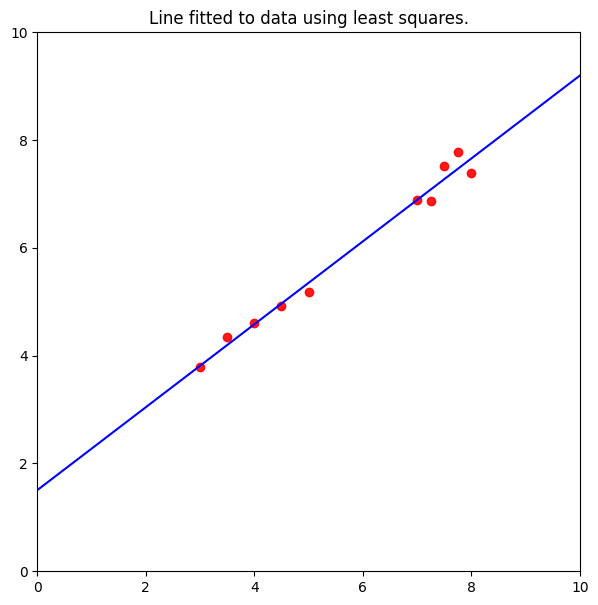

In [11]:
x_plotting = np.linspace(0,10,100)
y_plotting = m * x_plotting + c

plt.figure(figsize=(7,7))
plt.scatter(data[:,0], data[:,1], c='red', alpha=0.9)
plt.plot(x_plotting, y_plotting, 'b-')
plt.xlim([0,10])
plt.ylim([0,10])
plt.title('Line fitted to data using least squares.')

In [12]:
# 2D line fitting example 2

Text(0.5, 1.0, 'Generating some points from a line')

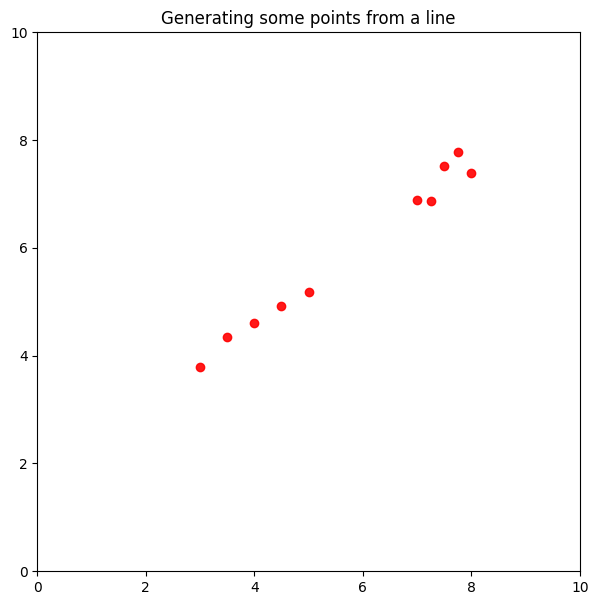

In [13]:
# Generate some data
np.random.seed(0)

m_true = .75
c_true = 1

x = np.hstack([np.linspace(3, 5, 5), np.linspace(7, 8, 5)])
y = m_true * x + c_true + np.random.rand(len(x))

#x = np.linspace(1,9,10)
#y = np.ones(10)+5

#y = np.linspace(1,9,10)
#x = np.ones(10)+5

data = np.vstack([x, y]).T
n = data.shape[0]

plt.figure(figsize=(7,7))
plt.scatter(data[:,0], data[:,1], c='red', alpha=0.9)
plt.xlim([0,10])
plt.ylim([0,10])
plt.title('Generating some points from a line')

In [14]:
print(f'data =\n{data}')
n = data.shape[0]
print(f'Number of data items = {n}')

data =
[[3.         3.7988135 ]
 [3.5        4.34018937]
 [4.         4.60276338]
 [4.5        4.91988318]
 [5.         5.1736548 ]
 [7.         6.89589411]
 [7.25       6.87508721]
 [7.5        7.516773  ]
 [7.75       7.77616276]
 [8.         7.38344152]]
Number of data items = 10


In [15]:
A = np.ones([n, 2])
A[:,0] = data[:,0]
print(f'A =\n{A}')

A =
[[3.   1.  ]
 [3.5  1.  ]
 [4.   1.  ]
 [4.5  1.  ]
 [5.   1.  ]
 [7.   1.  ]
 [7.25 1.  ]
 [7.5  1.  ]
 [7.75 1.  ]
 [8.   1.  ]]


In [16]:
AtA = np.dot(A.T,A)
print(f'AtA =\n {AtA}')

AtA =
 [[364.375  57.5  ]
 [ 57.5    10.   ]]


In [17]:
AtY = np.dot(A.T, data[:,1].reshape(n,1))
print(f'AtY = \n{AtY}')

AtY = 
[[366.83013724]
 [ 59.28266283]]


In [18]:
# m = slope
# c = intercept
m_and_c = np.dot(np.linalg.inv(AtA), AtY)

m = m_and_c[0]
c = m_and_c[1]

print(f'm = {m}')
print(f'c = {c}')

m = [0.76903188]
c = [1.50633297]


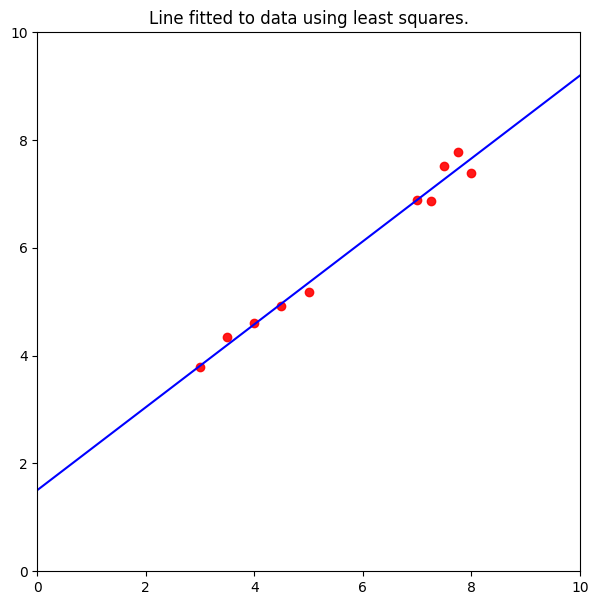

In [19]:
x_plotting = np.linspace(0,10,100)
y_plotting = m * x_plotting + c

plt.figure(figsize=(7,7))
plt.scatter(data[:,0], data[:,1], c='red', alpha=0.9)
plt.plot(x_plotting, y_plotting, 'b-')
plt.xlim([0,10])
plt.ylim([0,10])
plt.title('Line fitted to data using least squares.');

In [20]:
# 2D line fitting example 3

Text(0.5, 1.0, 'Generating some points from a line')

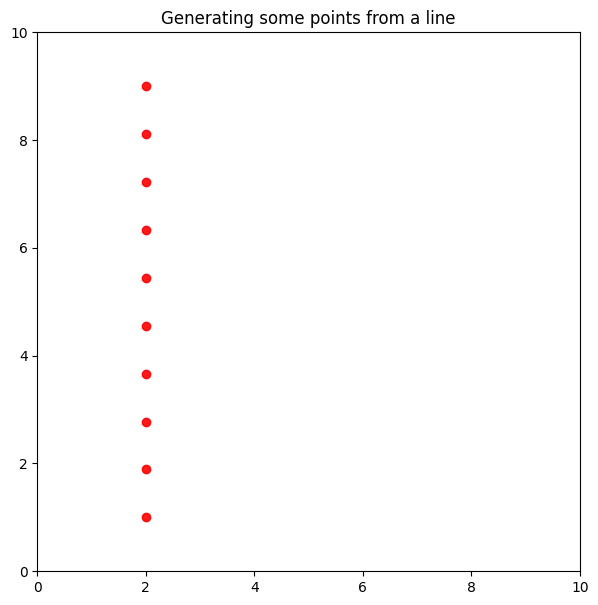

In [21]:
# Generate some data
np.random.seed(0)

m_true = .75
c_true = 1

# x = np.hstack([np.linspace(3, 5, 5), np.linspace(7, 8, 5)])
# y = m_true * x + c_true + np.random.rand(len(x))\

#x = np.linspace(1,9,10)
#y = np.ones(10)+5

y = np.linspace(1,9,10)
x = np.ones(10)+1

data = np.vstack([x, y]).T
n = data.shape[0]

plt.figure(figsize=(7,7))
plt.scatter(data[:,0], data[:,1], c='red', alpha=0.9)
plt.xlim([0,10])
plt.ylim([0,10])
plt.title('Generating some points from a line')

In [22]:
print(np.vstack((x,y)))

[[2.         2.         2.         2.         2.         2.
  2.         2.         2.         2.        ]
 [1.         1.88888889 2.77777778 3.66666667 4.55555556 5.44444444
  6.33333333 7.22222222 8.11111111 9.        ]]


In [23]:
print(f'x =\n {data[:,0].reshape(n,1)}')

x =
 [[2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]]


In [24]:
mean_x = np.mean(data[:,0])
print(f'mean_x = {mean_x}')

mean_x = 2.0


In [25]:
print(f'y =\n {data[:,1].reshape(n,1)}')

y =
 [[1.        ]
 [1.88888889]
 [2.77777778]
 [3.66666667]
 [4.55555556]
 [5.44444444]
 [6.33333333]
 [7.22222222]
 [8.11111111]
 [9.        ]]


In [26]:
mean_y = np.mean(data[:,1])
print(f'mean_x = {mean_y}')

mean_x = 5.0


In [27]:
A = np.hstack([(x-mean_x).reshape(n,1), (y-mean_y).reshape(n,1)])
print(f'A =\n{A}')

A =
[[ 0.         -4.        ]
 [ 0.         -3.11111111]
 [ 0.         -2.22222222]
 [ 0.         -1.33333333]
 [ 0.         -0.44444444]
 [ 0.          0.44444444]
 [ 0.          1.33333333]
 [ 0.          2.22222222]
 [ 0.          3.11111111]
 [ 0.          4.        ]]


In [28]:
AtA = np.dot(A.T, A)
print(f'AtA =\n{AtA}')

AtA =
[[ 0.          0.        ]
 [ 0.         65.18518519]]


In [29]:
e, v = np.linalg.eig(AtA)
print(f'eigenvalues = \n{e}')
print(f'eigenvectors = \n{v}')

eigenvalues = 
[ 0.         65.18518519]
eigenvectors = 
[[1. 0.]
 [0. 1.]]


In [30]:
smallest_eigen_value_index = np.argmin(e)
print(f'Index for smallest eigenvalue = {smallest_eigen_value_index}')

Index for smallest eigenvalue = 0


In [31]:
p = v[:, smallest_eigen_value_index]
print(f'Eigenvector corresponding to the smallest eigenvector =\n{p}')

Eigenvector corresponding to the smallest eigenvector =
[1. 0.]


In [32]:
a = p[0]
b = p[1]
c = - a * mean_x - b * mean_y

print(f'a = {a}, b={b}, and c={c}')

a = 1.0, b=0.0, and c=-2.0


Text(0.5, 1.0, 'Line fitted using total least squares')

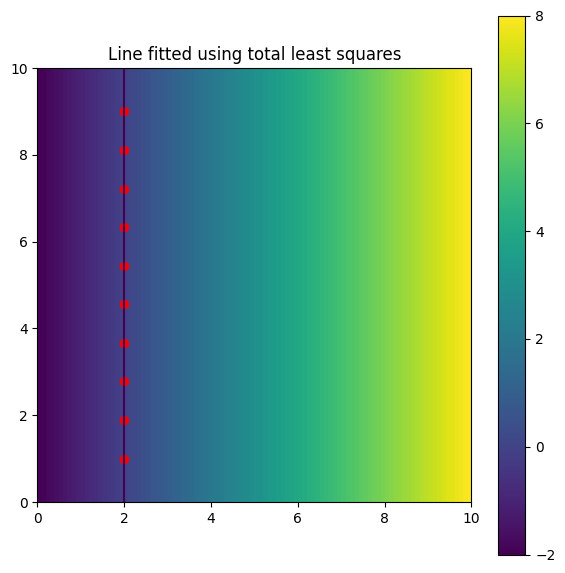

In [33]:
plotting_x = np.linspace(0, 10, 100)
plotting_y = np.linspace(0, 10, 100)
xx, yy = np.meshgrid(plotting_x, plotting_y)
z = a * xx + b * yy + c

fig = plt.figure(figsize=(7,7))
plt.imshow(z, origin='lower', extent=(0,10,0,10))
plt.colorbar()
plt.contour(xx, yy, z, [0])
plt.scatter(data[:,0], data[:,1], c='red', alpha=0.9)
plt.xlim([0,10])
plt.ylim([0,10])
plt.title('Line fitted using total least squares')